In [1]:
from plt_bulk import bulk_disp
import numpy as np
from collections import deque
from matplotlib import pyplot as plt
alat = 14.5533

In [2]:
param = np.zeros(11)
param[0] = 2.0 
param[1] = 2.0 
param[2] = -0.5 
param[3] = -0.15
param[5] = +0.05

param_k = [0.0,0.0, 3.29, 0.57, 0.00, -0.07, 0.19, 0.31, 0.47, 0.0, 0.04]
par_k_dm = param_k.copy()
par_k_dm[4] = 0.1
param_k_noil = param_k[:6] + 5*[0.] 
type(param_k_noil[6:]) ,param_k_noil


(list, [0.0, 0.0, 3.29, 0.57, 0.0, -0.07, 0.0, 0.0, 0.0, 0.0, 0.0])

In [3]:
direct = np.array([[  0.445836 , -0.257404 ,  0.857306],   
                   [ 0.000000  , 0.514807  , 0.857306 ], 
                   [-0.445836  , -0.257404 , 0.857306 ]])

recip = np.array([[ 1.121488, -0.647491,  0.388815],  
                  [ -0.000000,  1.294983, 0.388815],  
                  [ -1.121488, -0.647491,  0.388815]] ) 

In [4]:
inp = {
			 'param':-np.array(param_k), 
			 'S':3.0/2.0}
#
inp_dm = { 'param': -np.array(par_k_dm), 'S':3./2.}
k = np.array([1./3.,-1./3.,0.0])
zs = np.array([0.3333333,0.333333,0.3333333])
gk0 = [bulk_disp(*(c*k+3*zs), branch=0,**inp) for c in np.linspace(0.0,1.5,num=120)] 
gk1 = [bulk_disp(*(c*k+3*zs), branch=1,**inp) for c in np.linspace(0.0,1.5,num=120)]
gk0dm = [bulk_disp(*(c*k+3*zs), branch=0,**inp_dm) for c in np.linspace(0.0,1.5,num=120)] 
gk1dm = [bulk_disp(*(c*k+3*zs), branch=1,**inp_dm) for c in np.linspace(0.0,1.5,num=120)]
K = k.dot(recip)
h1 = np.array([1,-1,0]).dot(direct)
a_hex = np.sqrt((h1.dot(h1)))
sk = np.sqrt(K.dot(K))/a_hex
gkascissa = [c*sk for c in np.linspace(0.0,1.5,num=120)]

In [5]:
zs.dot(recip).dot(direct[0]+direct[1]+direct[2])

0.9999998971699365

In [6]:
K = k.dot(recip)  
m1 = np.sqrt(K.dot(K))
Kp = recip[0] -recip[2]
m2 = np.sqrt(Kp.dot(Kp))
Kp/3.0 

array([0.74765867, 0.        , 0.        ])

In [7]:
np.sqrt(direct[0].dot(direct[0]))

1.0000000678739978

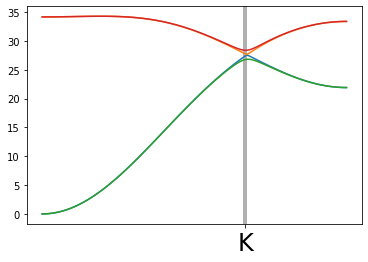

In [8]:
from matplotlib.pyplot import tick_params


plt.plot(gkascissa,gk0)
plt.plot(gkascissa,gk1)
plt.plot(gkascissa,gk0dm)
plt.plot(gkascissa,gk1dm)
plt.grid (visible=True, axis='x')
plt.xticks([sk],['K'], size=24)
plt.tick_params(grid_linewidth=4)

In [57]:
d = np.array([[0.1,0.0,0.0],[0.0,0.1,0.0],[0.0,0.0,0.1]])
d_frac= direct.T.dot(d)
d_frac[1].dot(recip)

array([ 0.0000000e+00,  9.9999986e-02, -3.8881500e-08])

In [10]:

from __future__ import barry_as_FLUFL
from pyrsistent import b


dodline = lambda dir,branch: [bulk_disp(*(k+c*d_frac[dir]),branch=branch, **inp) for c in np.linspace(-1.0,1.0,21)]
gap = lambda q,inp_: bulk_disp(*q,branch=1,**inp_)-bulk_disp(*q,branch=0, **inp_)
gapline = lambda dir,inp_=inp:[gap(k+c*d_frac[dir],inp_) for c in np.linspace(-1.0,1.0,21)]

gdx1 = dodline(dir=0,branch=0)
gdx2 = dodline(dir=0,branch=1)
gdy1 = dodline(dir=1,branch=0)
gdy2 = dodline(dir=1,branch=1)
gap1 = gapline(0)


([<matplotlib.axis.XTick at 0x7faff1cc7520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

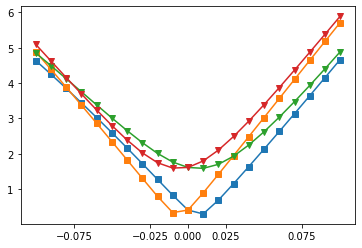

In [13]:
#plt.plot(np.linspace(-1,1,21), gdx2,marker='o')
#plt.plot(np.linspace(-1,1,21), gdx1, marker='o')
#plt.plot(np.linspace(-1,1,21), gdy1, marker='o')
#plt.plot(np.linspace(-1,1,21), gdy2, marker='o')
plt.plot(np.linspace(-1,1,21)*0.1, gapline(0), marker='s')
plt.plot(np.linspace(-1,1,21)*0.1, gapline(1), marker='s')
plt.plot(np.linspace(-1,1,21)*0.1, gapline(0,inp_dm), marker='v')
plt.plot(np.linspace(-1,1,21)*0.1, gapline(1,inp_dm), marker='v')
plt.xticks([-0.075,-0.025,0.0, 0.025, 0.075])

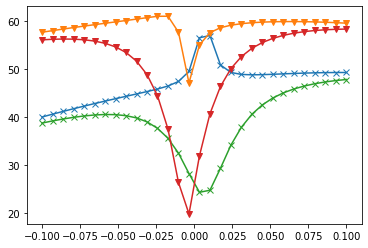

In [98]:
def gap_grad(o, disp, parms, v='fw'):
    direct = np.array([[  0.445836 , -0.257404 ,  0.857306],   
                   [ 0.000000  , 0.514807  , 0.857306 ], 
                   [-0.445836  , -0.257404 , 0.857306 ]])
    dx_frac = direct.dot([[disp,0.0,0.0],
                          [0.0,disp,0.0],
                          [0.0,0.0,disp]
                         ])
    gap = lambda q: bulk_disp(*q,branch=1,**parms)-bulk_disp(*q,branch=0, **parms)
    
    go = gap(o)
    if v == 'fw':
        dgx = (gap(o+dx_frac[0])-go)/disp
        dgy = (gap(o+dx_frac[1])-go)/disp
    elif v == 'bck':
        dgx = (go - gap(o-dx_frac[0]))/disp
        dgy = (go - gap(o-dx_frac[1]))/disp
    elif v == 'both':
        dgx = ((gap(o+dx_frac[0])- gap(o-dx_frac[0]))/disp)/2.0
        dgy = ((gap(o+dx_frac[1])- gap(o-dx_frac[1]))/disp)/2.0
    return np.array([dgx,dgy])

g = lambda s,d,par: gap_grad(k+s*d_frac[d],0.0001, par, v='bck')
gline = [np.sqrt(g(s,0,inp).dot(g(s,0,inp))) for s in np.linspace(-1.0,1.0,30)]
gline2 = [np.sqrt(g(s,1,inp).dot(g(s,1,inp))) for s in np.linspace(-1.0,1.0,30)]
gline_dm = [np.sqrt(g(s,0,inp).dot(g(s,0,inp_dm))) for s in np.linspace(-1.0,1.0,30)]
gline2_dm = [np.sqrt(g(s,1,inp).dot(g(s,1,inp_dm))) for s in np.linspace(-1.0,1.0,30)]
#
plt.plot(0.1*np.linspace(-1.0,1.0,30), gline,marker='x')
plt.plot(0.1*np.linspace(-1.0,1.0,30), gline2,marker='v')
plt.plot(0.1*np.linspace(-1.0,1.0,30), gline_dm, marker='x')
plt.plot(0.1*np.linspace(-1.0,1.0,30), gline2_dm, marker='v')

In [104]:
def steepest_descent_gap(o, disp,parms, v='fw'):
    direct = np.array([[  0.445836 , -0.257404 ,  0.857306],   
                   [ 0.000000  , 0.514807  , 0.857306 ], 
                   [-0.445836  , -0.257404 , 0.857306 ]])
    #
    gap = lambda q: bulk_disp(*q,branch=1,**parms)-bulk_disp(*q,branch=0, **parms)
    g = gap(o)
    grad = gap_grad(o,disp, parms, v)
    new_q_2D = -g/grad.dot(grad) * grad
    new_q_3D = np.array([new_q_2D[0],new_q_2D[1], 0.0])
    new_q_frac = o + direct.T.dot(new_q_3D)
    return(gap(new_q_frac)) 
    

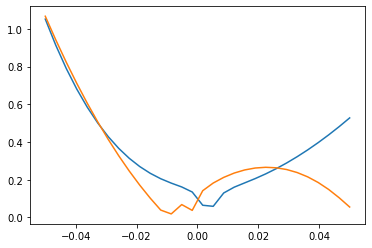

In [162]:
gs = lambda s,d,par: steepest_descent_gap(k+s*d_frac[d],0.0001,par,v='both')
gsline  = [gs(s,0,inp) for s in np.linspace(-1.0,1.0,30)]
gsline1 = [gs(s,1,inp) for s in np.linspace(-1.0,1.0,30)]
gsline
plt.plot(0.1 * np.linspace(-0.5,0.5,30), gsline)
plt.plot(0.1 * np.linspace(-0.5,0.5,30), gsline1)

In [167]:
gap(k,inp)

0.40360872141225457

In [ ]:
inp

In [42]:
t = direct.T.dot([[0.1,0.0,0.0],[0.0,0.1,0.0],[0.0,0.0,0.1]])
t

array([[ 0.0445836,  0.       , -0.0445836],
       [-0.0257404,  0.0514807, -0.0257404],
       [ 0.0857306,  0.0857306,  0.0857306]])

In [56]:
t[1].dot(recip[:,1])

0.09999998600090002

In [54]:
recip[0],recip[:,0]

(array([ 1.121488, -0.647491,  0.388815]),
 array([ 1.121488, -0.      , -1.121488]))